<a href="https://colab.research.google.com/github/nspweb/MachineLearning2024/blob/main/MachineLearning_E1E122004_AnnisaNurfadilah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **E1E122004 - Annisa Nurfadilah**




--- Menggunakan Library Pandas



In [1]:
import pandas as pd



--- Membaca Data Train dan Data Uji



In [2]:
train_data = pd.read_csv("/content/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/content/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S




--- Analisis Persentase Kelangsungan Hidup Wanita


---
Kode ini memfilter data pelatihan untuk hanya menyertakan informasi tentang wanita, kemudian menghitung dan menampilkan persentase wanita yang selamat dari total jumlah wanita dalam dataset.



In [4]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("jumlah wanita yang selamat :", rate_women)

jumlah wanita yang selamat : 0.7420382165605095




--- Analisis Persentase Kelangsungan Hidup Pria


---
Kode ini memfilter data pelatihan untuk hanya menyertakan informasi tentang pria, kemudian menghitung dan menampilkan persentase pria yang selamat dari total jumlah pria dalam dataset.



In [5]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("jumlah pria yang selamat :", rate_men)

jumlah pria yang selamat : 0.18890814558058924




--- Prediksi Kelangsungan Hidup Penumpang Menggunakan Random Forest Classifier



In [6]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
y = train_data["Survived"] # Mengambil target variable (Survived) dari dataset pelatihan sebagai y

features = ["Pclass", "Sex", "SibSp", "Parch"] # Menentukan fitur-fitur yang akan digunakan untuk membuat prediksi.
X = pd.get_dummies(train_data[features]) # Membuat variabel X sebagai matriks fitur dengan melakukan one-hot encoding pada fitur kategorikal menggunakan fungsi pd.get_dummies().
X_test = pd.get_dummies(test_data[features]) # Melakukan hal yang sama untuk data uji (test_data) untuk persiapan prediksi.

In [10]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1) # Membuat model
model.fit(X, y) # Melatih model
predictions = model.predict(X_test) # Melakukan Prediksi

In [13]:
import os

In [14]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions}) # Membuat DataFrame Hasil Prediksi

output_directory = '/content/'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

output.to_csv('submission.csv', index=False) # Menyimpan Hasil ke dalam File CSV
print("Your submission was successfully saved!") # Mencetak Pesan Konfirmasi

Your submission was successfully saved!




--- Melihat Hasil Akurasi Model dengan Dataset



In [15]:
from sklearn.metrics import accuracy_score

In [16]:
cek_data = pd.read_csv("/content/submission.csv")

In [17]:
label_aktual = cek_data['Survived']

In [18]:
accuracy = accuracy_score(label_aktual, predictions)
print(f"Hasil akurasi model: {accuracy}")

Hasil akurasi model: 1.0




--- Visualisasi Pohon Keputusan dari Random Forest Model untuk Dataset Titanic



In [20]:
from sklearn import tree # Mengimpor Library dan Mendefinisikan Mode
import matplotlib.pyplot as plt

In [22]:
visualisasi = model.estimators_[0] # Memilih Pohon untuk Divisualisasikan



*   Membuat subplot untuk menempatkan visualisasi pohon keputusan.
*   Menggunakan fungsi plot_tree dari modul tree untuk menggambar pohon keputusan.
*   Menyertakan informasi nama fitur, nama kelas, dan mengisi warna pada node pohon.







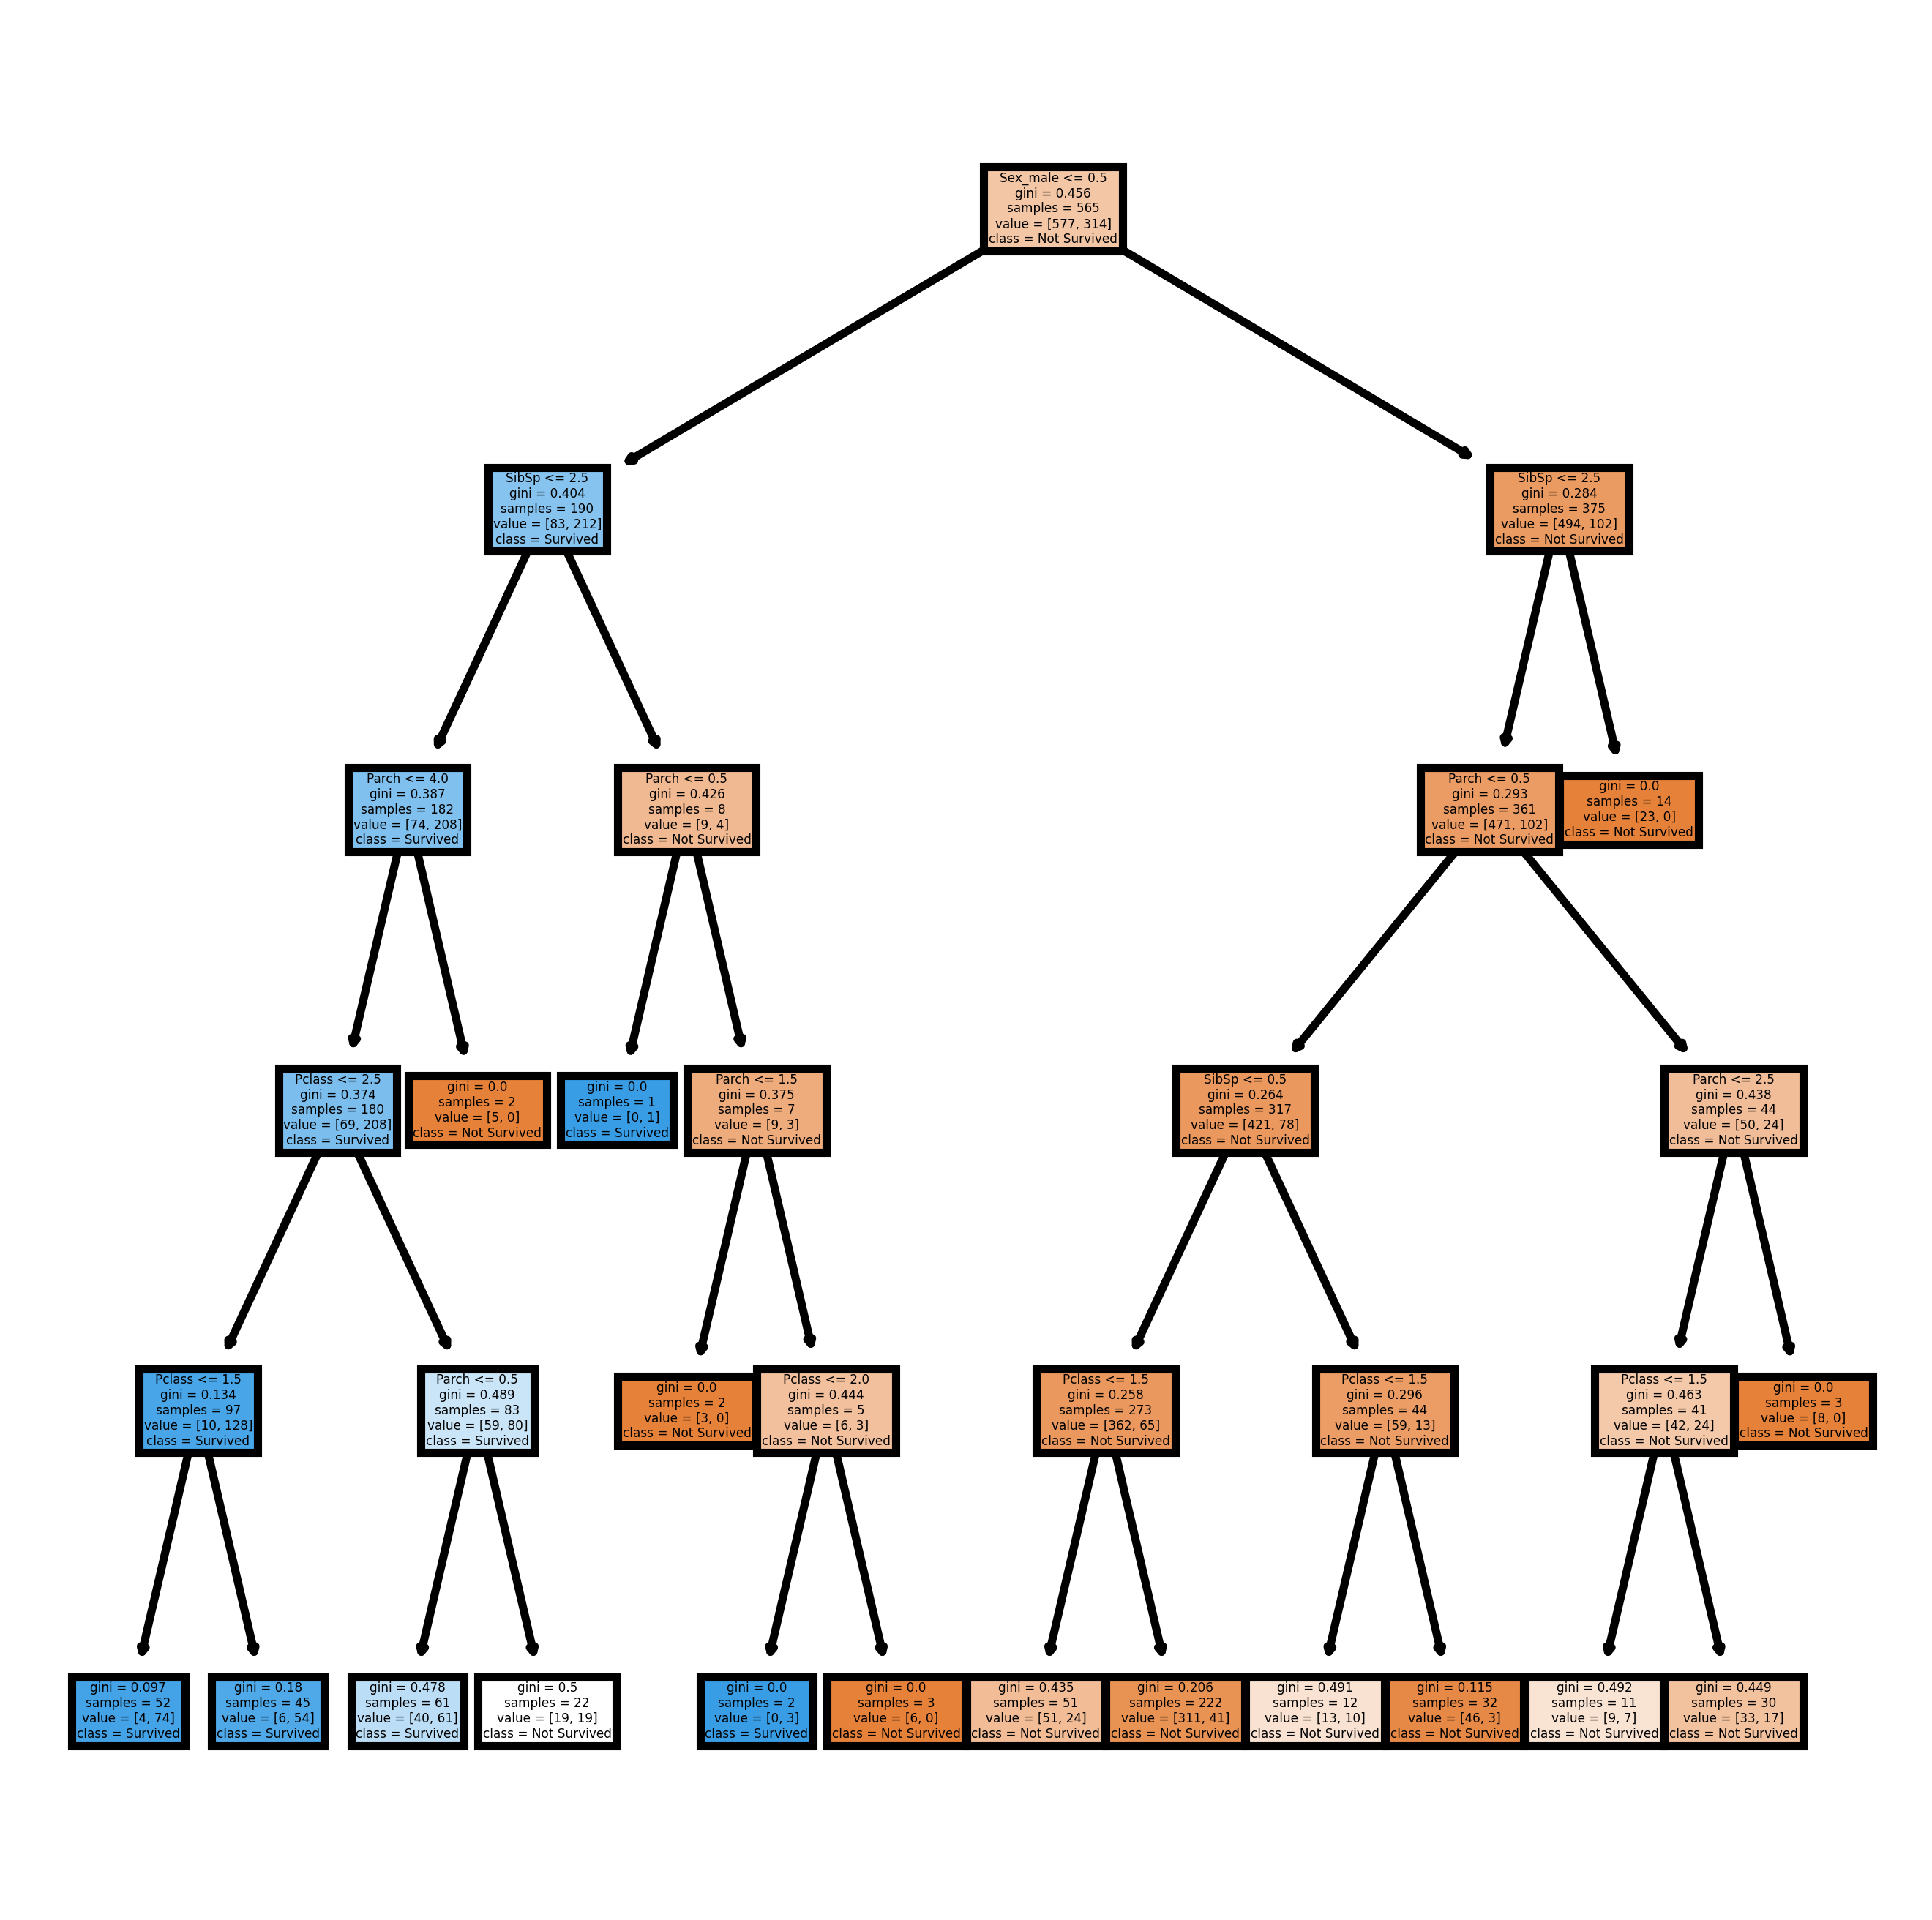

In [23]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(visualisasi,
               feature_names = X.columns,
               class_names=['Not Survived', 'Survived'],
               filled = True);

In [25]:
output_directory = '/content/'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

fig.savefig('random_forest_tree.png') # Menyimpan Visualisasi ke File